In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

midas_mean_si_log = [10.751052737236023, 10.53538286421034, 10.643628809187147, 10.750919546021356, 10.793968405546966, 10.839990177860967]
midas_mean_mae = [1.9581515619048366, 1.9429594410790338, 1.9670100983646182, 1.9950144283749438, 2.0004668116017625, 2.0113945251261747]
midas_mean_rsme = [2.5377430608978977, 2.473451218450511, 2.4954990757836235, 2.5284002835000003, 2.5273049548820214, 2.539877716369099]
midas_mean_sq_rel = [0.5154540850884385, 0.5056929012312106, 0.5142069776318278, 0.5305709970511359, 0.5271058934740722, 0.5319013843278366]
midas_mean_abs_rel = [0.14714071096645462, 0.14677750112281907, 0.1488117896158386, 0.15069684818111084, 0.15136428358102286, 0.15211631098969114]

dpt_tiny_mean_si_log = [10.506355868445503, 10.760032354460822, 10.775158750569378, 10.845960320366753, 10.89710840119256, 10.949120122415048]
dpt_tiny_mean_mae = [1.896480734149615, 1.9711370408535003, 1.9763962102157098, 1.9930899062642344, 2.0003411280336203, 2.008101299625856]
dpt_tiny_mean_rsme = [2.4746972461541494, 2.500236733975234, 2.5062066780196295, 2.5247934733276014, 2.5350095521520686, 2.5494389639960393]
dpt_tiny_mean_sq_rel = [0.4873482529901796, 0.5189870079220446, 0.5203532499847588, 0.5286383442442726, 0.5324709578175788, 0.5390945788196944]
dpt_tiny_mean_abs_rel = [0.1425898704815794, 0.14992211775647268, 0.1501387258508691, 0.15139782275590632, 0.15201535132472163, 0.15252615087838084]

dpt_large_mean_si_log = [8.10360219920123, 10.487732134924995, 10.481306130797774, 10.471940300199721, 10.490975452352453, 10.534788884939971]
dpt_large_mean_mae = [1.4314260083768102, 1.948505701566184, 1.9473651513457297, 1.943442508412732, 1.9454012879618892, 1.9528848148606441]
dpt_large_mean_rsme = [1.9602386658942257, 2.475995526159251, 2.4756073703368506, 2.473356322116322, 2.4777307286306662, 2.48769026376583]
dpt_large_mean_sq_rel = [0.3048198426728723, 0.5081060307065922, 0.5087521905010497, 0.5084438958619204, 0.5092316097476416, 0.5120663026313262]
dpt_large_mean_abs_rel = [0.1043136954376543, 0.14560323846009043, 0.14550988405804943, 0.1452398789425691, 0.14532203955782785, 0.14584971629083157]

targeted_midas_mean_si_log = [10.751052687786244, 10.470288288151776, 10.614834992973893, 10.684395281473796, 10.814241705117402, 10.868297327889337]
targeted_midas_mean_mae = [1.9581514042836647, 1.9048962102995979, 1.9392542259008796, 1.9607635038318458, 1.987820298804177, 1.997871807217598]
targeted_midas_mean_rsme = [2.537743020278436, 2.455454106794463, 2.4874278507850787, 2.504548308142909, 2.545776469508807, 2.5452467341113976]
targeted_midas_mean_sq_rel = [0.5154540662274316, 0.4979662386700511, 0.5111608871258795, 0.5178070278182901, 0.533009661168412, 0.5301785485267088]
targeted_midas_mean_abs_rel = [0.1471406978589517, 0.1449913226412954, 0.14757908193601502, 0.1488129348528606, 0.15040093446495356, 0.1514429745712766]

targeted_dpt_tiny_mean_si_log = [10.506355868445503, 10.567354937835976, 10.56812929224085, 10.581731439519812, 10.556186627017127, 10.54517884431062]
targeted_dpt_tiny_mean_mae = [1.896480734149615, 1.9420640450384883, 1.937118906279405, 1.9422940893857568, 1.9420913415926475, 1.9446535316606364]
targeted_dpt_tiny_mean_rsme = [2.4746972461541494, 2.461781769770163, 2.4636523019384455, 2.4664949687542737, 2.464437243949484, 2.4689774276757683]
targeted_dpt_tiny_mean_sq_rel = [0.4873482529901796, 0.5109920141701069, 0.5110718279042178, 0.5113788123509881, 0.5097736029049244, 0.5100471461096916]
targeted_dpt_tiny_mean_abs_rel = [0.1425898704815794, 0.14786192516071928, 0.14746880331939016, 0.14788703708736986, 0.14768162730529352, 0.14734374944258619]

targeted_dpt_large_mean_si_log = [8.10360219920123, 9.12901849128011, 10.1539503203498, 10.139256329889651, 10.12882314434758, 10.14021689361996]
targeted_dpt_large_mean_mae = [1.4314260083768102, 1.8757358388768302, 1.8721867982988005, 1.8692704744085118, 1.8681037926839457, 1.8736765075061057]
targeted_dpt_large_mean_rsme = [1.9602386658942257, 2.4304276142959242, 2.411673460845594, 2.3924678360974347, 2.3923987697120066, 2.397952541764136]
targeted_dpt_large_mean_sq_rel = [0.3048198426728723, 0.518695216194761, 0.49191592716163507, 0.4835663859559982, 0.4831172501633841, 0.48505170625393035]
targeted_dpt_large_mean_abs_rel = [0.1043136954376543, 0.14048588256593103, 0.14000090560703365, 0.13978892078416216, 0.13954738080501555, 0.13974407326981977]

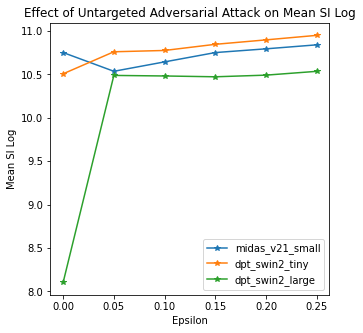

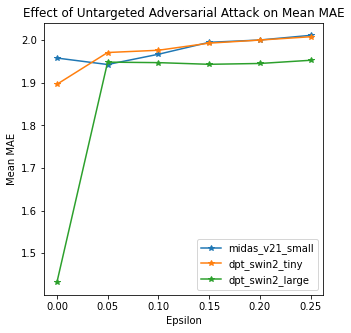

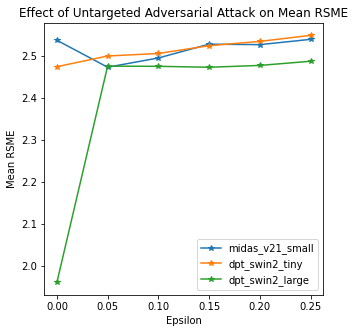

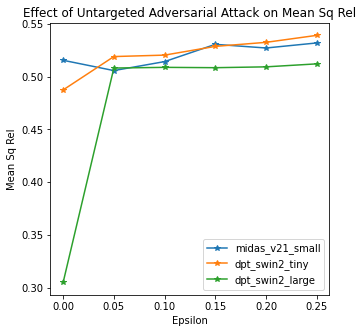

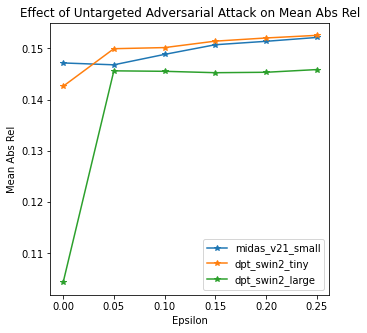

In [3]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, midas_mean_si_log, "*-", label="midas_v21_small")
plt.plot(epsilons, dpt_tiny_mean_si_log, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, dpt_large_mean_si_log, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Untargeted Adversarial Attack on Mean SI Log")
plt.xlabel("Epsilon")
plt.ylabel("Mean SI Log")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, midas_mean_mae, "*-", label="midas_v21_small")
plt.plot(epsilons, dpt_tiny_mean_mae, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, dpt_large_mean_mae, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Untargeted Adversarial Attack on Mean MAE")
plt.xlabel("Epsilon")
plt.ylabel("Mean MAE")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, midas_mean_rsme, "*-", label="midas_v21_small")
plt.plot(epsilons, dpt_tiny_mean_rsme, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, dpt_large_mean_rsme, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Untargeted Adversarial Attack on Mean RSME")
plt.xlabel("Epsilon")
plt.ylabel("Mean RSME")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, midas_mean_sq_rel, "*-", label="midas_v21_small")
plt.plot(epsilons, dpt_tiny_mean_sq_rel, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, dpt_large_mean_sq_rel, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Untargeted Adversarial Attack on Mean Sq Rel")
plt.xlabel("Epsilon")
plt.ylabel("Mean Sq Rel")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, midas_mean_abs_rel, "*-", label="midas_v21_small")
plt.plot(epsilons, dpt_tiny_mean_abs_rel, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, dpt_large_mean_abs_rel, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Untargeted Adversarial Attack on Mean Abs Rel")
plt.xlabel("Epsilon")
plt.ylabel("Mean Abs Rel")
plt.legend()
plt.show()

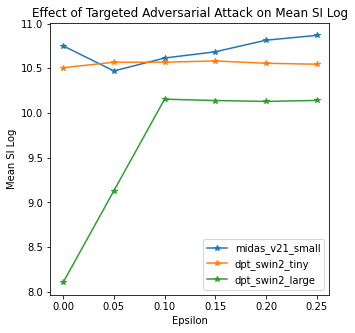

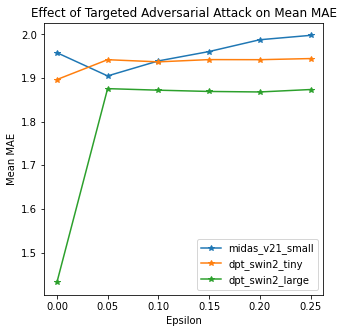

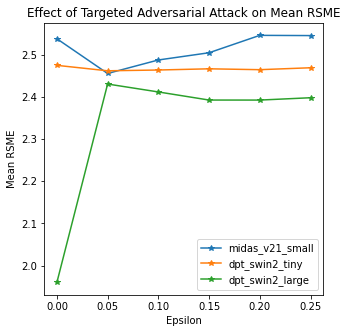

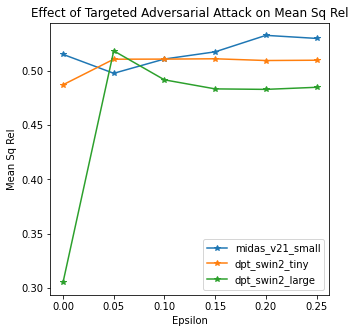

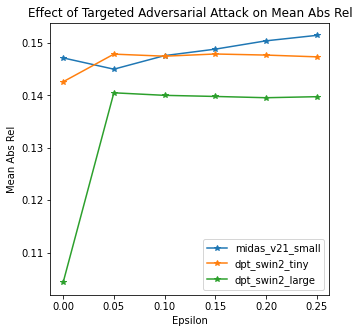

In [4]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, targeted_midas_mean_si_log, "*-", label="midas_v21_small")
plt.plot(epsilons, targeted_dpt_tiny_mean_si_log, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, targeted_dpt_large_mean_si_log, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Targeted Adversarial Attack on Mean SI Log")
plt.xlabel("Epsilon")
plt.ylabel("Mean SI Log")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, targeted_midas_mean_mae, "*-", label="midas_v21_small")
plt.plot(epsilons, targeted_dpt_tiny_mean_mae, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, targeted_dpt_large_mean_mae, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Targeted Adversarial Attack on Mean MAE")
plt.xlabel("Epsilon")
plt.ylabel("Mean MAE")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, targeted_midas_mean_rsme, "*-", label="midas_v21_small")
plt.plot(epsilons, targeted_dpt_tiny_mean_rsme, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, targeted_dpt_large_mean_rsme, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Targeted Adversarial Attack on Mean RSME")
plt.xlabel("Epsilon")
plt.ylabel("Mean RSME")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, targeted_midas_mean_sq_rel, "*-", label="midas_v21_small")
plt.plot(epsilons, targeted_dpt_tiny_mean_sq_rel, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, targeted_dpt_large_mean_sq_rel, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Targeted Adversarial Attack on Mean Sq Rel")
plt.xlabel("Epsilon")
plt.ylabel("Mean Sq Rel")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epsilons, targeted_midas_mean_abs_rel, "*-", label="midas_v21_small")
plt.plot(epsilons, targeted_dpt_tiny_mean_abs_rel, "*-", label="dpt_swin2_tiny")
plt.plot(epsilons, targeted_dpt_large_mean_abs_rel, "*-", label="dpt_swin2_large")
plt.xticks(np.arange(0, .3, step=0.05))
plt.title("Effect of Targeted Adversarial Attack on Mean Abs Rel")
plt.xlabel("Epsilon")
plt.ylabel("Mean Abs Rel")
plt.legend()
plt.show()

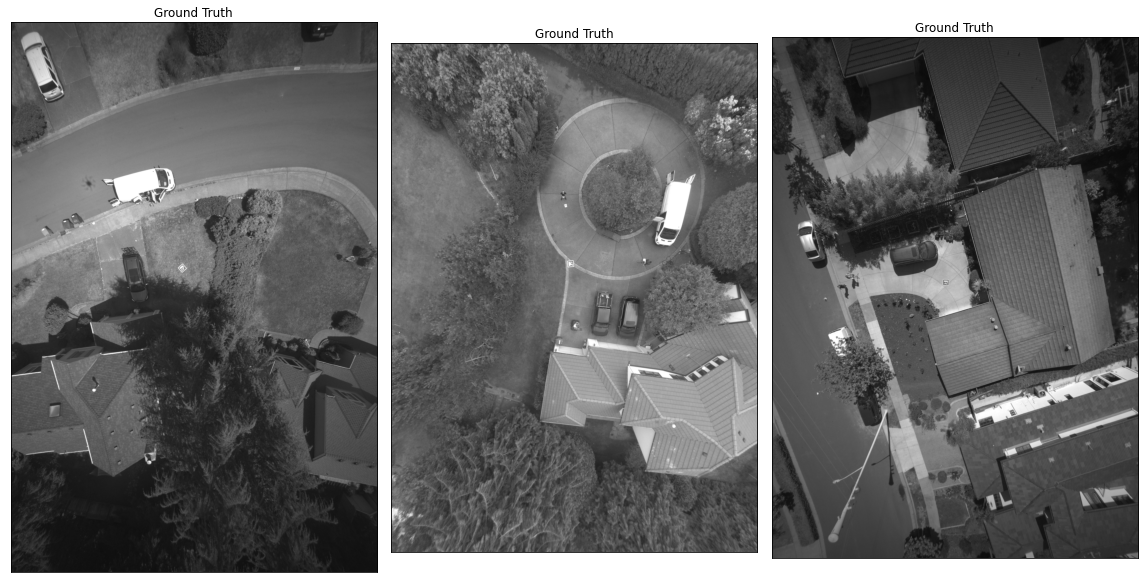

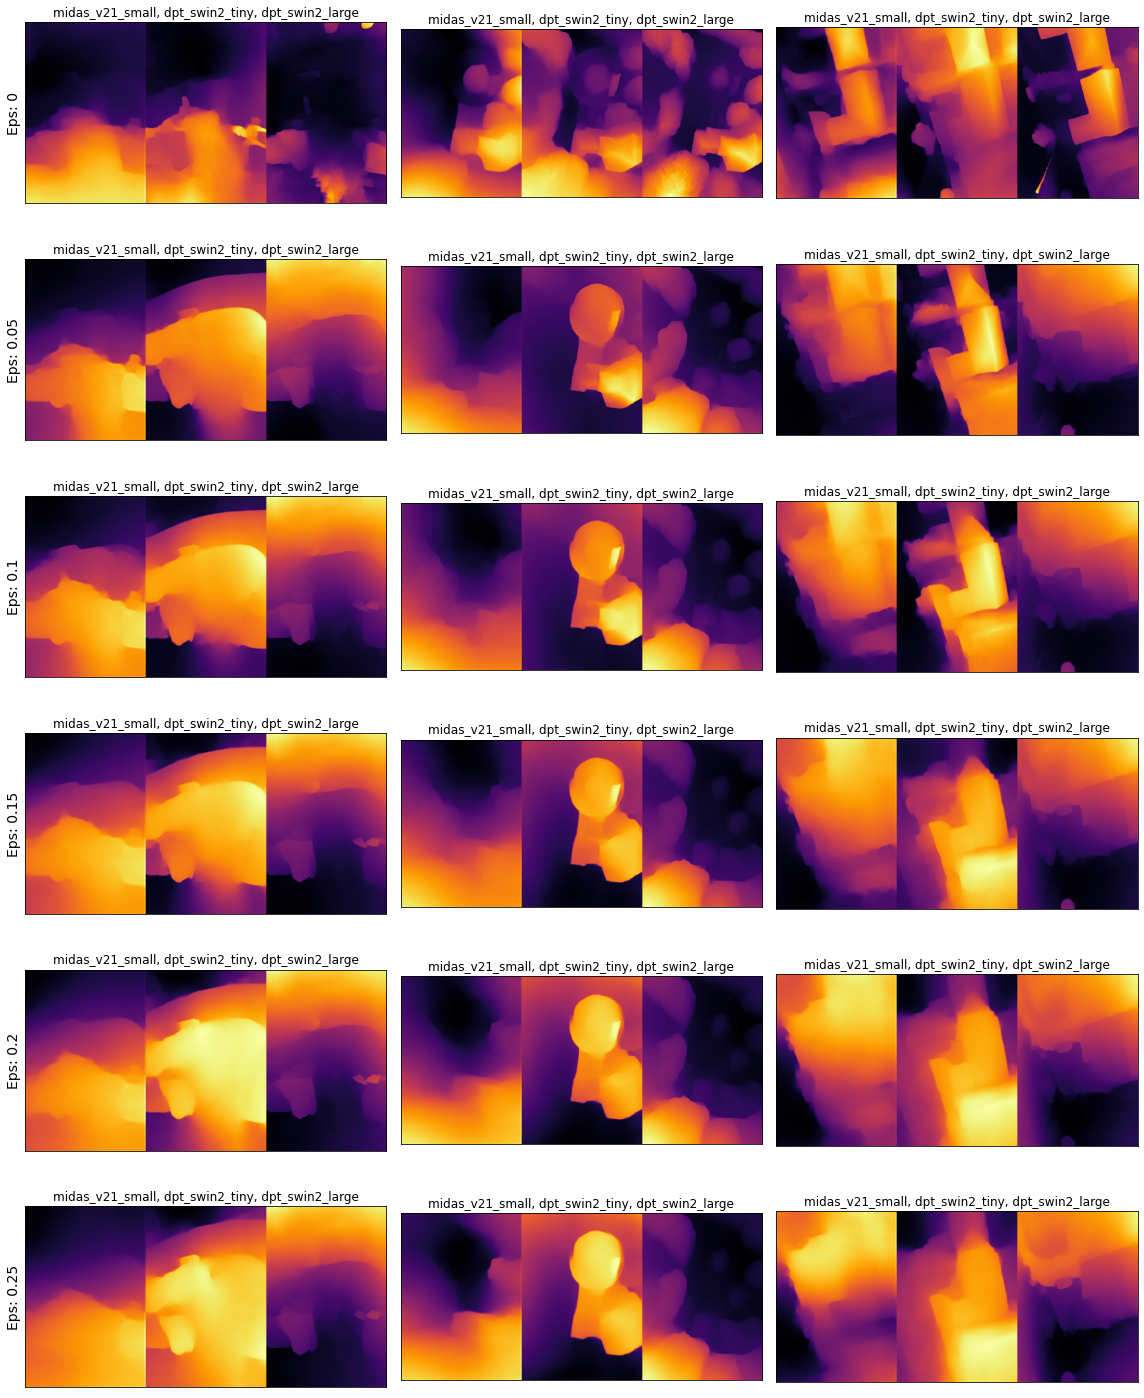

In [5]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_canvas(eps, file, targeted=False):
    canvas = None
    for model in models:
        if targeted:
            im = Image.open(f"viz/{model}_targeted/eps_{eps}/{file}")
        else:
            im = Image.open(f"viz/{model}/eps_{eps}/{file}")
        w, h = im.size
        left_x = int(w / 2) - 2
        right_x = w - left_x
        right_portion = im.crop((right_x, 0, w, h))
        if canvas is None:
            canvas = right_portion
        else:
            canvas = get_concat_h(canvas, right_portion)
    return canvas

def get_ground_truth(file):
    im = Image.open(f"viz/{models[0]}/eps_{epsilons[0]}/{file}")
    w, h = im.size
    left_x = int(w / 2) - 2
    left_portion = im.crop((0, 0, left_x, h))
    return left_portion

files = [
    "2bdb0560cb6a424e868b32abeb0ff1d0-1626210507600004009.png",
    "4a509f79565747b7818df23b79cf5b7f-1657143534200002003.png",
    "c0bf31f67b8a41819a2044d3d9505333-1621531062300005397.png"
    ]
epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
models = ["midas_v21_small", "dpt_swin2_tiny", "dpt_swin2_large"]

cnt = 0
plt.figure(figsize=(16,10))
for i in range(len(files)):
    cnt += 1
    plt.subplot(1,len(files),cnt)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("Ground Truth")
    plt.imshow(get_ground_truth(files[i]))

plt.tight_layout()
plt.show()

cnt = 0
plt.figure(figsize=(16,20))
for eps in epsilons:
    for i in range(len(files)):
        cnt += 1
        plt.subplot(len(epsilons),len(files),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0: plt.ylabel("Eps: {}".format(eps), fontsize=14)
        plt.title(", ".join(models))
        canvas = get_canvas(eps, files[i])
        plt.imshow(canvas)
        
plt.tight_layout()
plt.show()


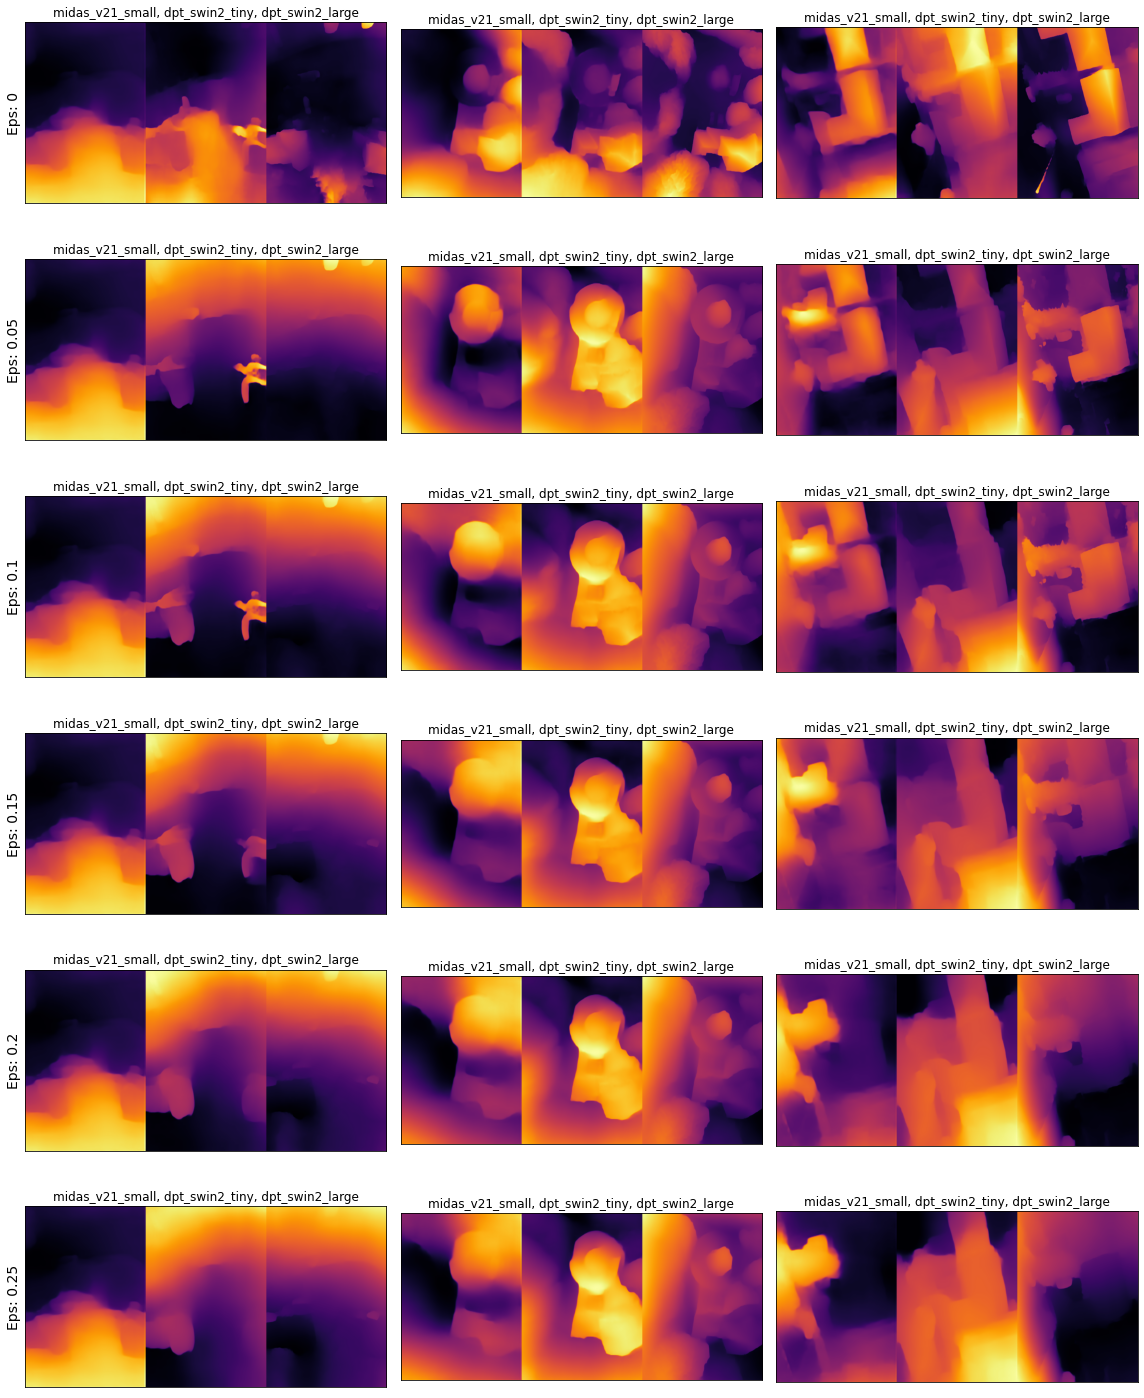

In [6]:
cnt = 0
plt.figure(figsize=(16,20))
for eps in epsilons:
    for i in range(len(files)):
        cnt += 1
        plt.subplot(len(epsilons),len(files),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0: plt.ylabel("Eps: {}".format(eps), fontsize=14)
        plt.title(", ".join(models))
        canvas = get_canvas(eps, files[i], targeted=True)
        plt.imshow(canvas)
        
plt.tight_layout()
plt.show()